Methods I'll need: (cz = constrainedzoom)

cz/init.py -> contains the method constraint_vector, which I assume creates the modification...

or maybe the method add_constraint from the cz/methods/geometric.py

cz/methods/filtered -> FilteredZoomConstrained is the main genetIC algorithm

Pseudocode:

Generate Gaussian White Noise (k,x space)

Post Matter Transfer function (k,x space)->pre-filtered

Post-filtered field (k,x space)

Propagate in time??

Pre-modified field

post-modified field

TODO:

create visualization of filtering

k-space stuff

add constraint example (is the default constraint working??)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import constrainedzoom as cz
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HIGH = 64
LOW = 32
SCALE = 2
OFFSET = 5
test = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

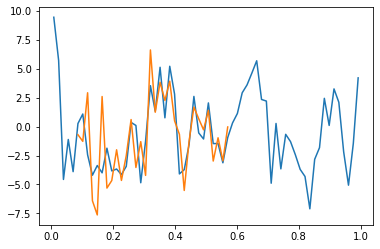

In [3]:
hi, lo = test.realization()
# realization creates random noise, but the results are AFTER the matter transfer function is applied.
pos = test.xs()
plt.plot(pos[0], hi)
plt.plot(pos[1], lo)

Text(0.5, 1.0, 'Unchanged White Noise in Position Space')

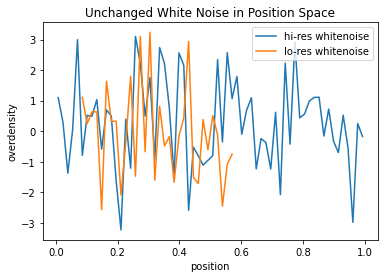

In [4]:
noiseP, noiseW = test._get_whitenoise()
# The noise is in Fourier space, transfer to real space
posnoiseP = noiseP.in_real_space()
posnoiseW = noiseW.in_real_space()
plt.plot(pos[0], posnoiseP, label='hi-res whitenoise')
plt.plot(pos[1], posnoiseW, label='lo-res whitenoise')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Unchanged White Noise in Position Space")

In [5]:
# ks = test._get_ks()
# plt.plot(ks[0], noiseW, label='hi-res whitenoise')
# plt.plot(ks[1], noiseP, label='lo-res whitenoise')
# plt.legend()
# plt.xlabel("k")
# plt.ylabel("overdensity")
# # make this an actual P(k) plot, I don't think this is the case right now
# # also there seems to be some issue with the k-values given they don't exactly make sense
# plt.title("Unchanged White Noise in K-Space")
# print(ks)

In [6]:
# adding default constraint
test.add_constraint()
#print(test.constraints)

Text(0.5, 1.0, 'constrained fields')

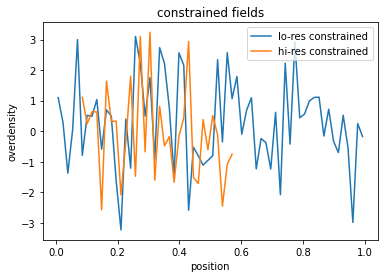

In [5]:
constrainedP, constrainedW = test._apply_constraints(noiseP, noiseW)
posconP = constrainedP.in_real_space()
posconW = constrainedW.in_real_space()
plt.plot(pos[0], posconP, label='lo-res constrained')
plt.plot(pos[1], posconW, label='hi-res constrained')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("constrained fields")

Text(0.5, 1.0, 'lo-res pre/post constraint')

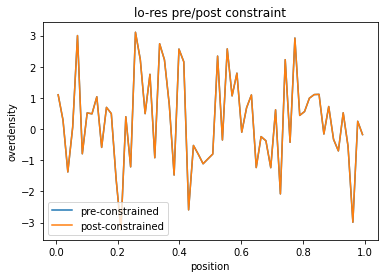

In [6]:
#Seeing if there's any difference in the pre- and post-constrained steps in lo res.

plt.plot(pos[0], posnoiseP, label='pre-constrained')
plt.plot(pos[0], posconP, label='post-constrained')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("lo-res pre/post constraint")

Text(0.5, 1.0, 'hi-res pre/post constraint')

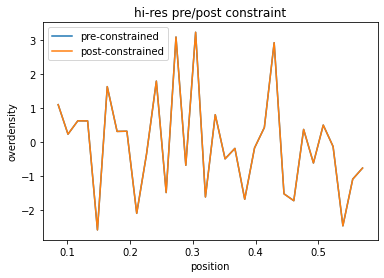

In [7]:
plt.plot(pos[1], posnoiseW, label='pre-constrained')
plt.plot(pos[1], posconW, label='post-constrained')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("hi-res pre/post constraint")

Text(0.5, 1.0, 'Post-Matter Transfer Function White Noise')

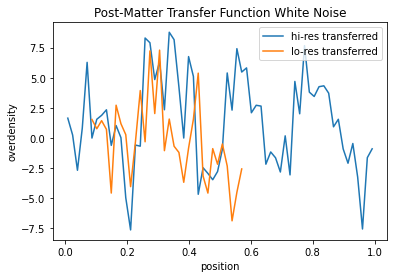

In [8]:
# this gets put into a matter transfer function...
deltaP, deltaW = test._apply_transfer_function(noiseP, noiseW)
delnoiseP = deltaP.in_real_space()
delnoiseW = deltaW.in_real_space()
plt.plot(pos[0], delnoiseP, label='hi-res transferred')
plt.plot(pos[1], delnoiseW, label='lo-res transferred')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Post-Matter Transfer Function White Noise")

Text(0.5, 1.0, 'Comparing before and after transfer function')

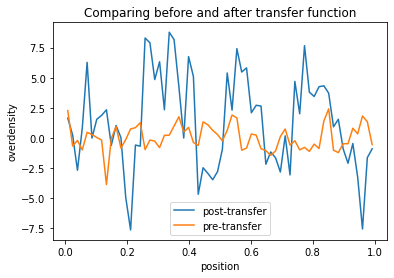

In [9]:
# showing the difference in pre and post matter transfer function
plt.plot(pos[0], delnoiseP, label='post-transfer')
plt.plot(pos[0], constrainedP, label='pre-transfer')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Comparing before and after transfer function")

In [12]:
# Here, in filtered approach, the constraints are applied to the transferred data rather than the noise itself...

Text(0.5, 1.0, 'Recombination - low res effects in hi-res')

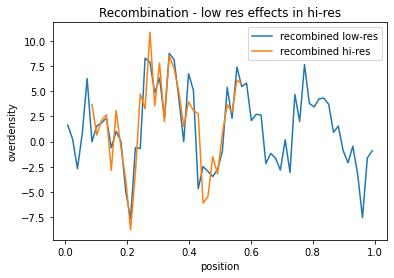

In [10]:
# recombining fields... does this do anything if there are no constraints??
recombinedP, recombinedW = test._recombine_fields(deltaP, deltaW)
posrecP, posrecW = recombinedP.in_real_space(), recombinedW.in_real_space()
plt.plot(pos[0],posrecP, label='recombined low-res')
plt.plot(pos[1], posrecW, label='recombined hi-res')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Recombination - low res effects in hi-res")

Text(0.5, 1.0, 'lo-res pre/post recombination')

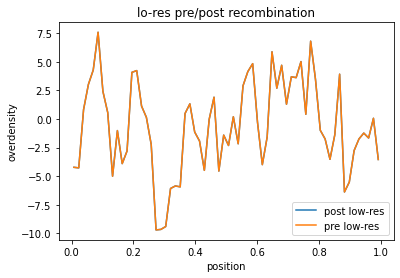

In [14]:
# seeing if there are any changes in the low-res region... There shouldn't be
plt.plot(pos[0], posrecP, label='post low-res')
plt.plot(pos[0], delnoiseP, label='pre low-res')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("lo-res pre/post recombination")

Text(0.5, 1.0, 'hi-res pre/post recombination')

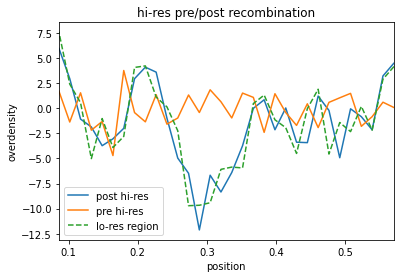

In [15]:
# looking at the changes in the hi-res region... there should be changes
plt.plot(pos[1], posrecW, label='post hi-res')
plt.plot(pos[1], delnoiseW, label='pre hi-res')
plt.plot(pos[0], delnoiseP, '--', label='lo-res region')
plt.legend()
plt.xlabel("position")
plt.xlim(pos[1][0], pos[1][-1])
plt.ylabel("overdensity")
plt.title("hi-res pre/post recombination")